# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

_pista: keras.datasets_

In [1]:
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
data = dataset.load_data()

2024-07-22 18:21:34.371357: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-22 18:21:34.443024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 18:21:34.474231: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 18:21:34.484067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 18:21:34.530697: I tensorflow/core/platform/cpu_feature_guar

In [2]:
len(data)

2

In [3]:
len(data[0])

2

In [4]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [6]:
X_train.shape[0]

60000

In [7]:
import pandas as pd

pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

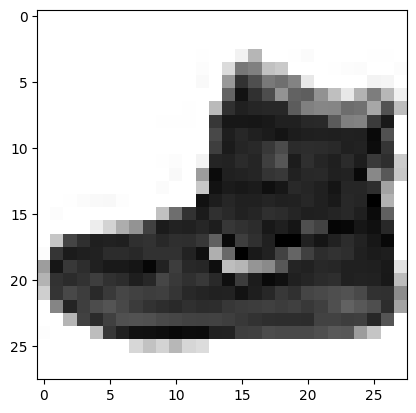

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")

In [10]:
class_names[y_train[0]]

'Ankle boot'

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [11]:
X_train.max()

255

In [12]:
X_train = X_train/255
X_test = X_test/255

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

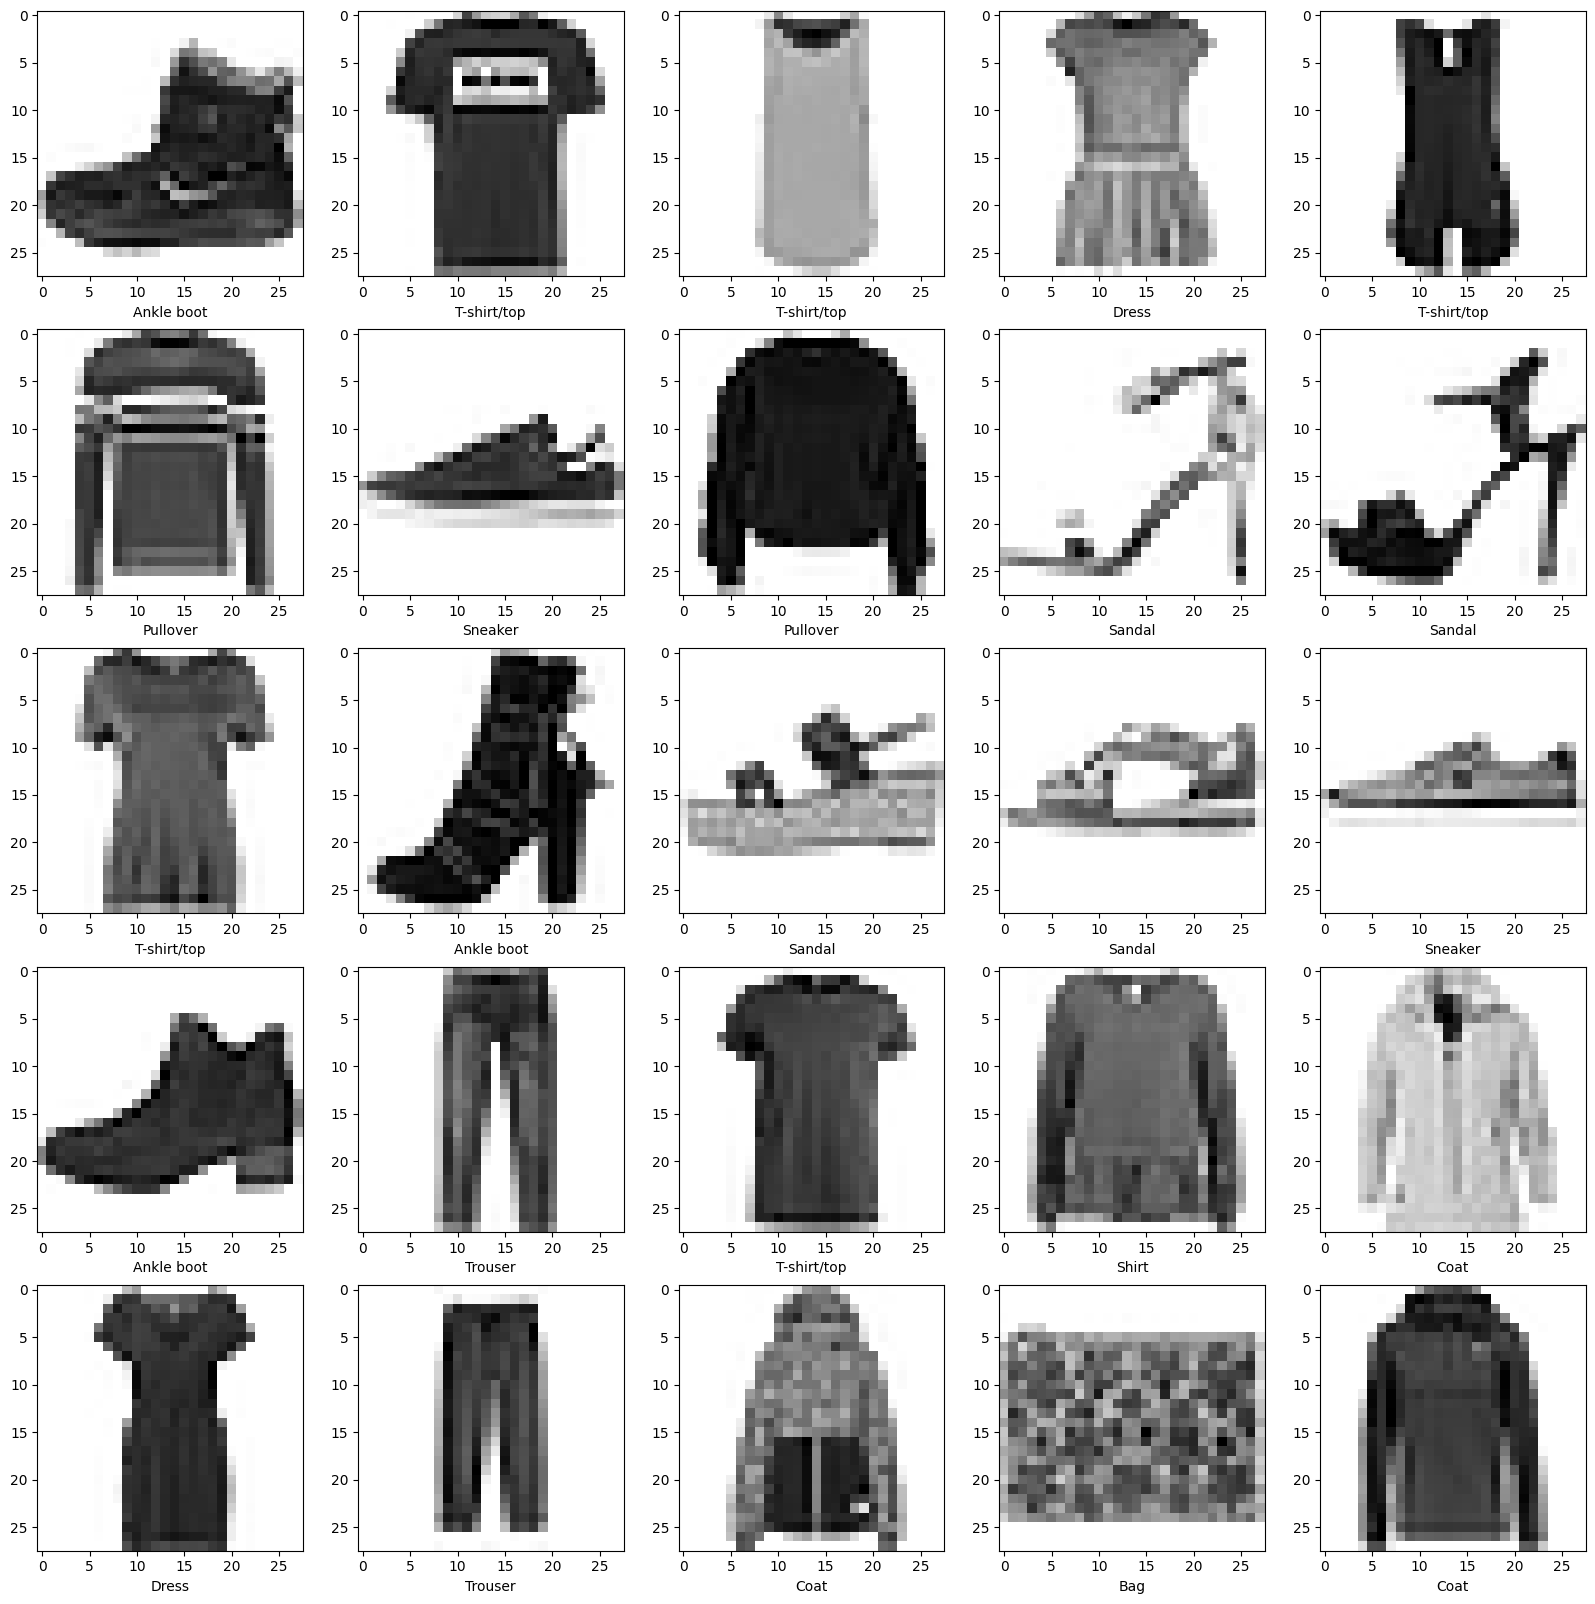

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256),
    keras.layers.Dense(128),
    keras.layers.Dense(32),
    keras.layers.Dense(10, activation="softmax")
])

/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv311/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1721665656.518331   11939 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-22 18:27:36.589980: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your 

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [16]:
model.compile(optimizer="sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7284 - loss: 0.7867 - val_accuracy: 0.8300 - val_loss: 0.4943
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8338 - loss: 0.4811 - val_accuracy: 0.8373 - val_loss: 0.4498
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8383 - loss: 0.4563 - val_accuracy: 0.8405 - val_loss: 0.4508
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8438 - loss: 0.4425 - val_accuracy: 0.8455 - val_loss: 0.4357
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8505 - loss: 0.4305 - val_accuracy: 0.8427 - val_loss: 0.4330
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8487 - loss: 0.4286 - val_accuracy: 0.8393 - val_loss: 0.4428
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8569 - loss: 0.4098 - val_accuracy: 0.8475 - val_loss: 0.4320
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.4107 - 

<Axes: >

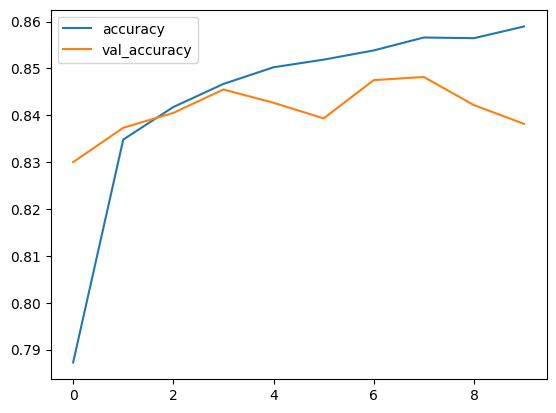

In [19]:
import pandas as pd

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [20]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8275 - loss: 0.4776


[0.4799087345600128, 0.8237000107765198]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [21]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.0644344e-06, 4.1199621e-07, 1.3709202e-05, ..., 4.9787410e-02,
        4.4431021e-03, 8.5716444e-01],
       [4.0927911e-04, 1.0172728e-06, 6.1596131e-01, ..., 9.4387074e-13,
        1.1225535e-05, 1.3904607e-13],
       [6.5104805e-06, 9.9998808e-01, 1.4007983e-06, ..., 6.8110892e-11,
        1.9541059e-08, 2.3754284e-13],
       ...,
       [8.7716907e-02, 1.5013511e-06, 3.0328939e-03, ..., 1.1908610e-05,
        5.5498326e-01, 9.6869606e-08],
       [2.7958455e-07, 9.9995995e-01, 4.6198025e-07, ..., 2.2477435e-08,
        2.2544246e-08, 6.4991504e-08],
       [6.2837724e-05, 1.1304521e-05, 1.2561140e-04, ..., 2.0615606e-02,
        4.9212193e-03, 8.8417233e-04]], dtype=float32)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [22]:
import numpy as np

y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([9, 2, 1, ..., 8, 1, 5])

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [23]:
from matplotlib import colormaps

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=colormaps.get("Grey"))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

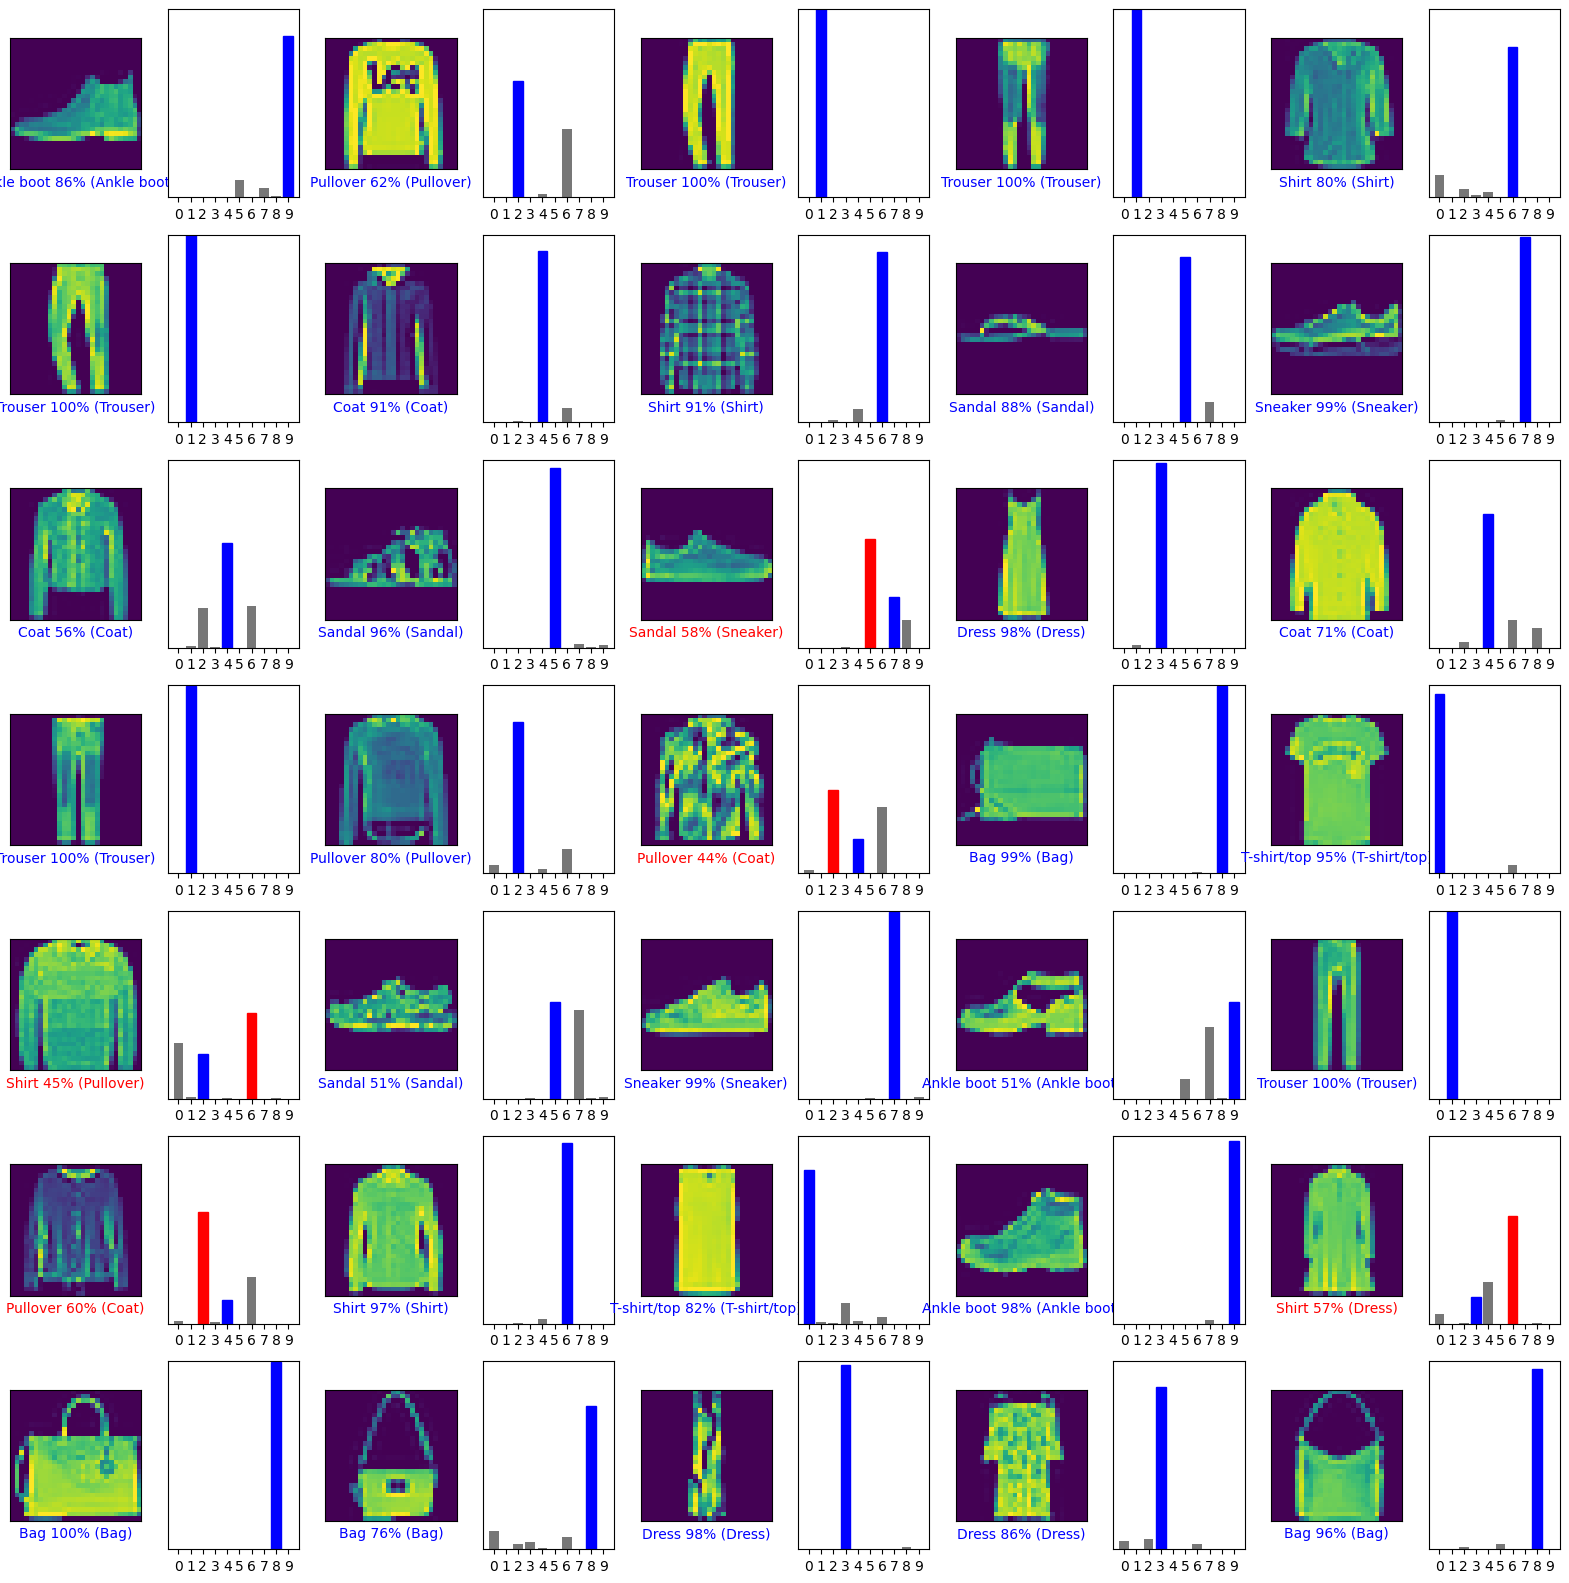

In [24]:
n_rows = 7
n_cols = 5
n_img = n_rows * n_cols

plt.figure(figsize=(20,20))

for i in range(n_img):
    # plt.figure(figsize=(15,7))
    plt.subplot(n_rows, n_cols*2, 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)

Evalúa tu modelo con una matriz de confusión e interprétala.

<Axes: >

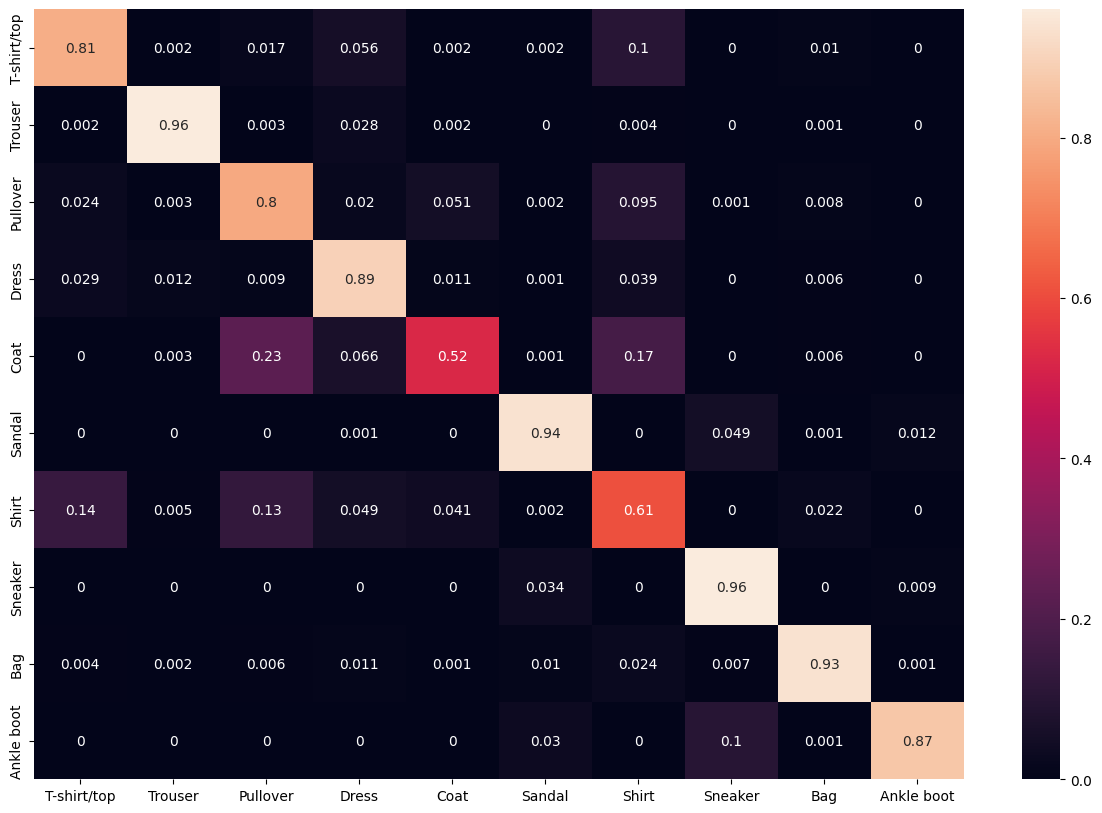

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, y_pred_labels, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.67      0.80      0.73      1000
           3       0.79      0.89      0.84      1000
           4       0.83      0.52      0.64      1000
           5       0.92      0.94      0.93      1000
           6       0.58      0.61      0.60      1000
           7       0.86      0.96      0.90      1000
           8       0.94      0.93      0.94      1000
           9       0.98      0.87      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [28]:
num = np.random.choice(range(0, 9999))
num

6648

In [29]:
class_names[np.argmax(model.predict(X_test[num:num+1]))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


'Shirt'

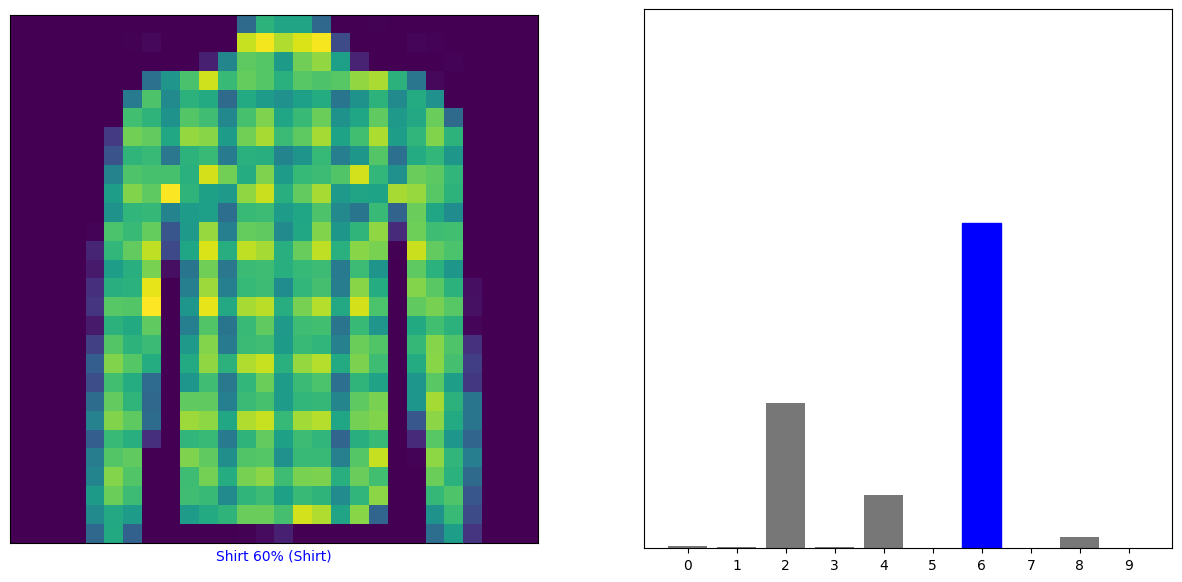

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plot_image(num, y_pred[num], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(num, y_pred[num], y_test)